In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
print("Missing values : \n",data.isnull().sum())

Missing values : 
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [3]:
label_encoder=LabelEncoder()
data['Gender']=label_encoder.fit_transform(data['Gender'])

In [4]:
x=data[['EstimatedSalary']]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [5]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

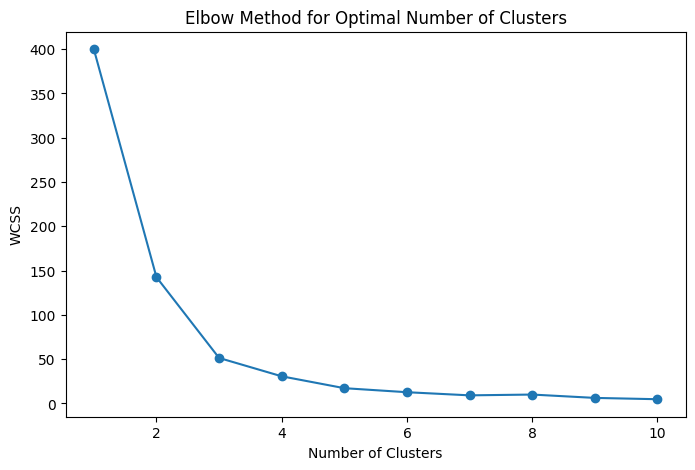

In [9]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(x_scaled)

# Display the first few rows with assigned clusters
data[['EstimatedSalary', 'Cluster']].head()

,EstimatedSalary,Cluster
0,19000,1
1,20000,1
2,43000,1
3,57000,0
4,76000,0


In [15]:
score=silhouette_score(x_scaled,data['Cluster'])
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.60


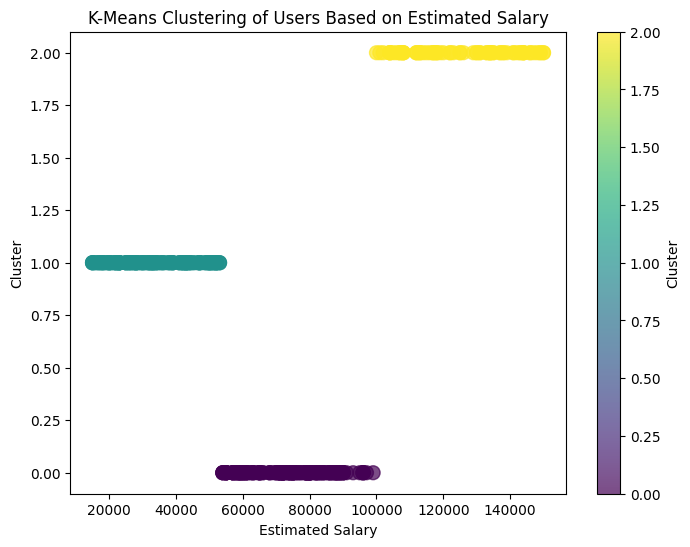

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(data['EstimatedSalary'], data['Cluster'], c=data['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering of Users Based on Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Cluster')
plt.colorbar(label='Cluster')
plt.show()

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Missing values per column:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


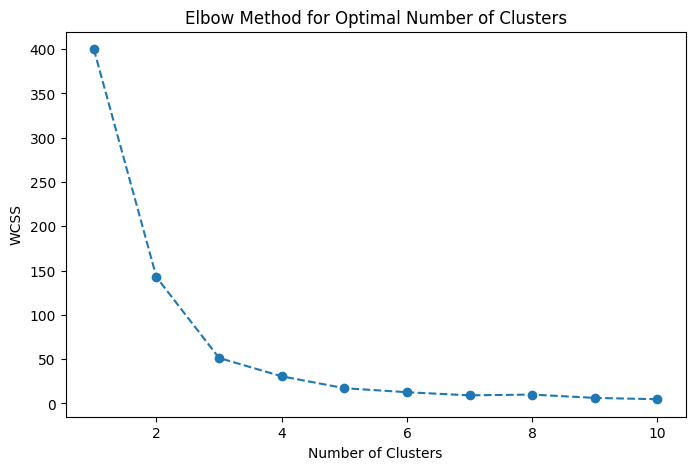

   EstimatedSalary  Cluster
0            19000        1
1            20000        1
2            43000        1
3            57000        0
4            76000        0
Silhouette Score: 0.60


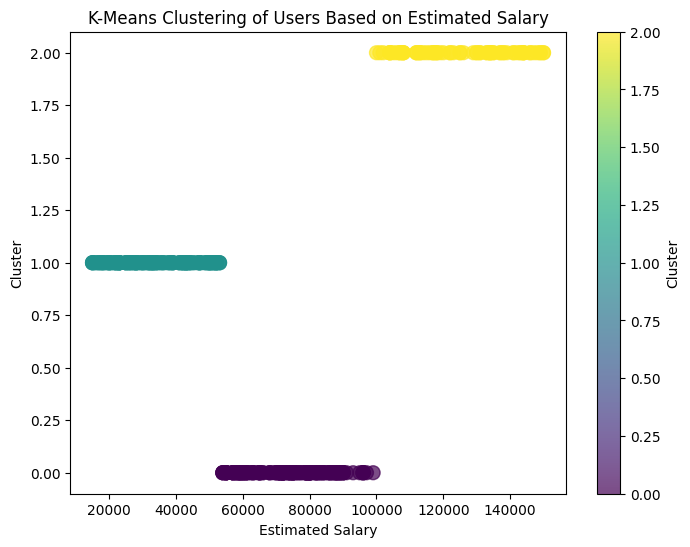